## Print all output, import packages

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import pandas as pd
import os
import sys
from pathlib import Path
import time
import numpy as np
import datetime
import geopandas as gpd
import matplotlib as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

laptop = 'forgach1mar822'

## Import csv data, clean data

In [3]:
########## IMPORT BICYCLE TRIP CSV FILES FROM 2014-2018 ##########

# Run time calculation
start_time = time.time()

print ('Importing bicycle trip files...')

dirstring = 'C:/Users/' + laptop + '/Dropbox/1_ELTE/Szakdolgozat/Adatforras/Bubi adatforras'
os.chdir(dirstring)

# Create a list with file names
month_list = ['bubi_01_jan', 'bubi_02_feb', 'bubi_03_marc', 'bubi_04_apr', 'bubi_05_maj', 'bubi_06_jun', \
              'bubi_07_jul', 'bubi_08_aug', 'bubi_09_szept', 'bubi_10_okt', 'bubi_11_nov', 'bubi_12_dec']
#print (month_list)

# Create an empty list that will contain all the dataframe names
df_name_list=list()

for i in range(2014,2021):
    dirstring = 'C:/Users/' + laptop + '/Dropbox/1_ELTE/Szakdolgozat/Adatforras/Bubi adatforras/' + str(i)
    os.chdir(dirstring)
    print("Year: " + str(i))
    
    for j in month_list:
        filestring = dirstring + '/' + j + '.csv'
        my_file = Path(filestring)       

        if my_file.exists():
            exec('{} = pd.DataFrame(pd.read_csv(filestring))'.format(j + '_' + str(i)))
            #print(j + '_' + str(i), end = '\r')
            df_name_list.append(j + '_' + str(i))

            
########## CREATE COMBINED DATAFRAME ##########

print ('Creating combined dataframe...')
frames = [bubi_09_szept_2014, bubi_10_okt_2014, bubi_11_nov_2014, bubi_12_dec_2014, bubi_01_jan_2015, bubi_02_feb_2015, \
bubi_03_marc_2015, bubi_04_apr_2015, bubi_05_maj_2015, bubi_06_jun_2015, bubi_07_jul_2015, bubi_08_aug_2015, \
bubi_09_szept_2015, bubi_10_okt_2015, bubi_11_nov_2015, bubi_12_dec_2015, bubi_01_jan_2016, bubi_02_feb_2016, \
bubi_03_marc_2016, bubi_04_apr_2016, bubi_05_maj_2016, bubi_06_jun_2016, bubi_07_jul_2016, bubi_08_aug_2016, \
bubi_09_szept_2016, bubi_10_okt_2016, bubi_11_nov_2016, bubi_12_dec_2016, bubi_01_jan_2017, bubi_02_feb_2017, \
bubi_03_marc_2017, bubi_04_apr_2017, bubi_05_maj_2017, bubi_06_jun_2017, bubi_07_jul_2017, bubi_08_aug_2017, \
bubi_09_szept_2017, bubi_10_okt_2017, bubi_11_nov_2017, bubi_12_dec_2017, bubi_01_jan_2018, bubi_02_feb_2018, \
bubi_03_marc_2018, bubi_04_apr_2018, bubi_05_maj_2018, bubi_06_jun_2018, bubi_07_jul_2018, bubi_08_aug_2018, \
bubi_09_szept_2018, bubi_10_okt_2018, bubi_11_nov_2018, bubi_12_dec_2018, bubi_01_jan_2019, bubi_02_feb_2019, \
bubi_03_marc_2019, bubi_04_apr_2019, bubi_05_maj_2019, bubi_06_jun_2019, bubi_07_jul_2019, bubi_08_aug_2019, \
bubi_09_szept_2019, bubi_10_okt_2019, bubi_11_nov_2019, bubi_12_dec_2019, bubi_01_jan_2020, bubi_02_feb_2020, \
bubi_03_marc_2020, bubi_04_apr_2020, bubi_05_maj_2020, bubi_06_jun_2020, bubi_07_jul_2020]


bubi_total = pd.concat(frames, sort=False)
print("Összes rekord: " + str(bubi_total.shape))


########## FIX ENCODING ##########
print ('Fixing encoding issues...')
#bubi_total['Name'].unique()

ticket_encoding_dict = {
    '24 ĂłrĂˇs jegy - promĂłciĂłs': '24 órás jegy - promóciós', 
    '24 ĂłrĂˇs jegy': '24 órás jegy', 
    '72 ĂłrĂˇs jegy - promĂłciĂłs': '72 órás jegy – promóciós', 
    '72 ĂłrĂˇs jegy': '72 órás jegy',
    'Ă©ves bĂ©rlet - BKK employee': 'éves bérlet – BKK employee', 
    'Ă©ves bĂ©rlet - ingyenes': 'éves bérlet – ingyenes',
    'Ă©ves bĂ©rlet - promĂłciĂłs - BKSZ': 'éves bérlet – promóciós', 
    'Ă©ves bĂ©rlet - promĂłciĂłs': 'éves bérlet – promóciós',
    'Ă©ves bĂ©rlet normĂˇl - ingyenes': 'éves bérlet normál – ingyenes', 
    'Ă©ves bĂ©rlet normĂˇl BKSZ': 'éves bérlet normál BKSZ',
    'Ă©ves bĂ©rlet normĂˇl': 'éves bérlet normál', 
    'fĂ©lĂ©ves bĂ©rlet - ingyenes': 'féléves bérlet – ingyenes',
    'fĂ©lĂ©ves bĂ©rlet - promĂłciĂłs diĂˇk': 'féléves bérlet – promóciós diák', 
    'fĂ©lĂ©ves bĂ©rlet - promĂłciĂłs': 'féléves bérlet – promóciós',
    'fĂ©lĂ©ves bĂ©rlet normĂˇl': 'féléves bérlet normál', 
    'kupon Ă©ves bĂ©rlet normal': 'kupon éves bérlet normal',
    'kupon Ă©ves bĂ©rlet promĂłciĂłs': 'kupon éves bérlet promóciós', 
    'kupon Ă©ves egyedi kedvezmĂ©ny 5%': 'kupon éves egyedi kedvezmény 5%',
    'kupon fĂ©lĂ©ves bĂ©rlet normal': 'kupon féléves bérlet normal', 
    'kupon fĂ©lĂ©ves bĂ©rlet promĂłciĂłs': 'kupon féléves bérlet promóciós',
    'Kupon negyedĂ©ves bĂ©rlet normĂˇl': 'Kupon negyedéves bérlet normál', 
    'kupon negyedĂ©ves bĂ©rlet promĂłciĂłs': 'kupon negyedéves bérlet promóciós',
    'MĂşzeumi MOL Bubi bĂ©rlet': 'Múzeumi MOL Bubi bérlet', 
    'MĂşzeumi MOL Bubi bérlet': 'Múzeumi MOL Bubi bérlet', 
    'negyedĂ©ves bĂ©rlet - promĂłciĂłs': 'negyedéves bérlet - promóciós',
    'negyedĂ©ves bĂ©rlet ingyenes': 'negyedéves bérlet ingyenes', 
    'negyedĂ©ves bĂ©rlet normĂˇl': 'negyedéves bérlet normál', 
    'start bĂ©rlet - promĂłciĂłs': 'Start bérlet – promóciós',
    'start bĂ©rlet - promotional - ingyenes': 'Start bérlet – promóciós – ingyenes', 
    'SzĂˇmla postĂˇzĂˇsa': 'Számla postázása'
}

station_encoding_dict = {
    '1114-Moholy-Nagy Művészeti Egyetem': '1114-Bertalan Lajos utca - Műegyetem rakpart',
    '1114-Műegyetem rakpart – R épület': '1114-Bertalan Lajos utca - Műegyetem rakpart',
    '1115-Magyar tudósok körútja - Műegyetem Q épület': '1115-Műegyetem Q épület',
    '1116-Egry József utca - E épület': '1116-Egry József utca',
    '1117-Moholy-Nagy Művészeti Egyetem': '1117-Műegyetem rakpart – R épület',
    '1120-C4P Mobilitási Pont': '1120-Budapart Gate'
}

# Replace name column with dictionary items
bubi_total = bubi_total.replace({'Name': ticket_encoding_dict})
bubi_total = bubi_total.replace({'Start station': station_encoding_dict})


########## Delete maintenance records ##########
print("Deleting maintenance records...")
print(
    "Maintenance records start: " + \
    str(len(bubi_total[bubi_total['Start station'].isin(['9993-Műhely5',  '9994-IT', '9997-Somogyi Műhely4', 'Közbringa Műhely', 'nan'])])) + \
    "  Maintenance records end: " +  \
    str(len(bubi_total[bubi_total['End station'].isin(['9993-Műhely5',  '9994-IT', '9997-Somogyi Műhely4', 'Közbringa Műhely', 'nan'])])) + \
    "  Nan records start: " + \
    str(len(bubi_total[bubi_total['Start station'].isna()])) + \
    "  Nan records end: " + \
    str(len(bubi_total[bubi_total['End station'].isna()])))

bubi_total = bubi_total[~bubi_total['Start station'].isin(['9993-Műhely5',  '9994-IT', '9997-Somogyi Műhely4', 'Közbringa Műhely', 'nan'])]
bubi_total = bubi_total[~bubi_total['End station'].isin(['9993-Műhely5',  '9994-IT', '9997-Somogyi Műhely4', 'Közbringa Műhely', 'nan'])]
bubi_total = bubi_total[~bubi_total['Start station'].isna()]
bubi_total = bubi_total[~bubi_total['End station'].isna()]

# Print out unique ticket types
#bubi_total['Name'].unique()

bubi_total.columns = ['Berles_UID', 'Start_time_1', 'End_time_1', 'Start_station', 'End_station', 'UID', 'Bike_number', 'Price', 'UID2', 'Ticket', 'Country']
bubi_total = bubi_total.drop(['UID2', 'Country', 'Price'], axis=1)


########## Fix date columns in the dataframe ##########
print ('Fixing date columns...')
#bubi_total['start_date'] = bubi_total.Start_time.str.slice(stop=10)
#bubi_total['start_time'] = bubi_total.Start_time.str.slice(start=11, stop=19)
#bubi_total['end_date'] = bubi_total.End_time.str.slice(stop=10)
#bubi_total['end_time'] = bubi_total.End_time.str.slice(start=11, stop=19)

bubi_total['Start_time'] = bubi_total.Start_time_1.str.slice(stop=10) + " " + bubi_total.Start_time_1.str.slice(start=11, stop=19)
bubi_total['End_time'] = bubi_total.End_time_1.str.slice(stop=10) + " " + bubi_total.End_time_1.str.slice(start=11, stop=19)

bubi_total = bubi_total.drop(['Start_time_1', 'End_time_1'], axis=1)

# Convert time columns to datetime format
print ('Converting date columns...')
bubi_total['start_time'] = pd.to_datetime(bubi_total['Start_time'], format = '%Y-%m-%d %H:%M:%S')
bubi_total['end_time'] = pd.to_datetime(bubi_total['End_time'], format = '%Y-%m-%d %H:%M:%S')

# Drop old columns
bubi_total = bubi_total.drop(['Start_time', 'End_time'], axis=1)

## Calculate time spent on bike
print ('Calculating time spent on bike...')
bubi_total['time'] = bubi_total['end_time']-bubi_total['start_time']


########## Data cleaning ##########
print('Data cleaning...')
# data mistake
bubi_total = bubi_total[bubi_total.Berles_UID != 25544722]

# clock shift
bubi_total = bubi_total[bubi_total.Berles_UID != 25067593]
bubi_total = bubi_total[bubi_total.Berles_UID != 8315309]
bubi_total = bubi_total[bubi_total.Berles_UID != 14734792]
bubi_total = bubi_total[bubi_total.Berles_UID != 40434134]
bubi_total = bubi_total[bubi_total.Berles_UID != 25067603]
bubi_total = bubi_total[bubi_total.Berles_UID != 14734818]
bubi_total = bubi_total[bubi_total.Berles_UID != 14734815]
bubi_total = bubi_total[bubi_total.Berles_UID != 14734811]
bubi_total = bubi_total[bubi_total.Berles_UID != 8315281]
bubi_total = bubi_total[bubi_total.Berles_UID != 14734754]
bubi_total = bubi_total[bubi_total.Berles_UID != 25067528]
bubi_total = bubi_total[bubi_total.Berles_UID != 8315269]
bubi_total = bubi_total[bubi_total.Berles_UID != 8315267]
bubi_total = bubi_total[bubi_total.Berles_UID != 8315268]
bubi_total = bubi_total[bubi_total.Berles_UID != 40434152]
bubi_total = bubi_total[bubi_total.Berles_UID != 28485219]
bubi_total = bubi_total[bubi_total.Berles_UID != 29083126]
bubi_total = bubi_total[bubi_total.Berles_UID != 28083444]
bubi_total = bubi_total[bubi_total.Berles_UID != 28758741] 
bubi_total = bubi_total[bubi_total.Berles_UID != 29502557]
bubi_total = bubi_total[bubi_total.Berles_UID != 38611187]

# 0 minute rents
#bubi_total = bubi_total[bubi_total.start_time != bubi_total.end_time]

# Less then 1 minute rents
print(
    "Less than 1 min trips: " + str(len(bubi_total[bubi_total.time < '00:01:00'])) +
    "  More than 12 hour trips: " + str(len(bubi_total[bubi_total.time > '12:00:00'])))
bubi_total = bubi_total[bubi_total.time > '00:01:00']
bubi_total = bubi_total[bubi_total.time < '12:00:00']


########## IMPORT STATION DATA ##########
print('Importing station data...')

os.chdir('C:/Users/' + laptop + '/Dropbox/1_ELTE/Szakdolgozat/Adatforras/Bubi adatforras/Allomas adatok')

station_data = pd.read_excel("Bubi_gyak_koord_201709.xlsx")
station_data = station_data.drop(['Utem', 'Comment', 'Station name'], axis=1)
station_data.rename(columns = {'lng':'lon', 'Station ID': 'Station_id'}, inplace = True) 

#Replace District roman numbers to arabic
station_data = station_data.replace({'District' : { 'I' : 1,'II' : 2,'III' : 3,'V' : 5,    'VI' : 6,'VII' : 7,'VIII' : 8,'IX' : 9,'XI' : 11,'XII' : 12,    'XIII' : 13,'XIV' : 14 }})

print('Creating gpd geometry objects...')
#station_data['station_geometry'] = geometry=gpd.points_from_xy(station_data.lon, station_data.lat)
station_data = gpd.GeoDataFrame(station_data, geometry=gpd.points_from_xy(station_data.lon, station_data.lat))


########## OPTIONAL: Small sample for testing ##########
#print ('Creating small sample for testing...')
#bubi_total = bubi_total[:1000]

########## OPTIONAL: Export dataframe to CSV ##########
#print ('Exporting dataframe to csv...')
#os.chdir('C:/Users/' + laptop + '/Desktop')
#bubi_total.to_csv('bubi_total.csv', sep='\t', encoding='utf-8')

#bubi_total.head(1)
#station_data.head(1)

print("Done! %s seconds" % round((time.time() - start_time)))

Importing bicycle trip files...
Year: 2014
Year: 2015
Year: 2016
Year: 2017
Year: 2018
Year: 2019
Year: 2020
Creating combined dataframe...
Összes rekord: (3116519, 11)
Fixing encoding issues...
Deleting maintenance records...
Maintenance records start: 30  Maintenance records end: 130  Nan records start: 2549  Nan records end: 3731
Fixing date columns...
Converting date columns...
Calculating time spent on bike...
Data cleaning...
Less than 1 min trips: 56122  More than 12 hour trips: 1417
Importing station data...
Creating gpd geometry objects...
Done! 38 seconds


In [4]:
bubi_total.head()
station_data.head()

,Berles_UID,Start_station,End_station,UID,Bike_number,Ticket,start_time,end_time,time
0,7367458,0709-Rumbach Sebestyén utca - BKK,0709-Rumbach Sebestyén utca - BKK,858994.0,86325.0,féléves bérlet – promóciós,2014-09-08 00:00:32,2014-09-08 00:01:34,0 days 00:01:02
4,7368289,0709-Rumbach Sebestyén utca - BKK,0709-Rumbach Sebestyén utca - BKK,858913.0,86405.0,féléves bérlet – promóciós,2014-09-08 06:55:50,2014-09-08 06:57:22,0 days 00:01:32
5,7368300,0709-Rumbach Sebestyén utca - BKK,0709-Rumbach Sebestyén utca - BKK,858913.0,86268.0,féléves bérlet – promóciós,2014-09-08 06:56:28,2014-09-08 06:57:36,0 days 00:01:08
6,7368312,0709-Rumbach Sebestyén utca - BKK,0709-Rumbach Sebestyén utca - BKK,858913.0,86268.0,féléves bérlet – promóciós,2014-09-08 06:57:40,2014-09-08 06:59:18,0 days 00:01:38
7,7368341,0202-Horvát utca,0202-Horvát utca,855197.0,86284.0,féléves bérlet – promóciós,2014-09-08 07:00:29,2014-09-08 07:05:35,0 days 00:05:06


,District,Station_id,Station,Rack number,lat,lon,Start date,End date,Move date,Shutdown start,Shutdown end,geometry
0,1.0,101.0,0101-Batthyány tér,28.0,47.506406,19.039172,2014-09-08,NaT,2015-01-15,2015-02-01,2015-04-22,POINT (19.03917 47.50641)
1,1.0,102.0,0102-Szilágyi Dezső tér,15.0,47.503424,19.039714,2014-09-08,NaT,NaT,NaT,NaT,POINT (19.03971 47.50342)
2,1.0,103.0,0103-Clark Ádám tér,16.0,47.497585,19.040915,2014-09-08,NaT,NaT,NaT,NaT,POINT (19.04091 47.49759)
3,1.0,104.0,0104-Döbrentei tér,22.0,47.491279,19.045116,2014-09-08,NaT,NaT,NaT,NaT,POINT (19.04512 47.49128)
4,1.0,105.0,0105-Déli pályaudvar,28.0,47.499858,19.025487,2014-09-08,NaT,NaT,NaT,NaT,POINT (19.02549 47.49986)


<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='start_time,start_time'>

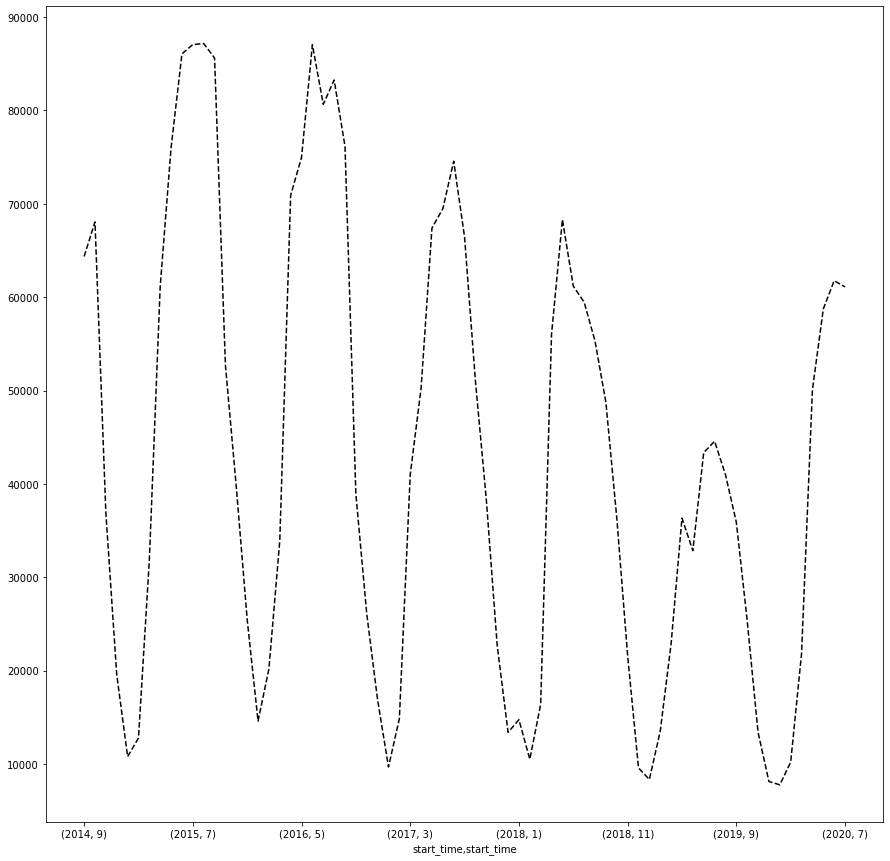

In [75]:
bubi_usage_per_month = bubi_total['start_time'].groupby([bubi_total.start_time.dt.year, bubi_total.start_time.dt.month]).agg('count')

plt.figure.Figure(); bubi_usage_per_month.plot(style='k--', label='Series', figsize = (15,15))